## Data Analysis with Python: Zero to Pandas - Course Project Guidelines
#### (remove this cell before submission)

Important links:
- Make submissions here: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
- Ask questions here: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
- Find interesting datasets here: https://jovian.ml/forum/t/recommended-datasets-for-course-project/11711


This is the starter notebook for the course project for [Data Analysis with Python: Zero to Pandas](https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas). You will pick a real-world dataset of your choice and apply the concepts learned in this course to perform exploratory data analysis. Use this starter notebook as an outline for your project . Focus on documentation and presentation - this Jupyter notebook will also serve as a project report, so make sure to include detailed explanations wherever possible using Markdown cells.

### Evaluation Criteria

Your submission will be evaluated using the following criteria:

* Dataset must contain at least 3 columns and 150 rows of data
* You must ask and answer at least 4 questions about the dataset
* Your submission must include at least 4 visualizations (graphs)
* Your submission must include explanations using markdown cells, apart from the code.
* Your work must not be plagiarized i.e. copy-pasted for somewhere else.


Follow this step-by-step guide to work on your project.


### Step 1: Select a real-world dataset 

- Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
- The data should be in CSV format, and should contain at least 3 columns and 150 rows
- Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

Here's some sample code for downloading the [US Elections Dataset](https://www.kaggle.com/tunguz/us-elections-dataset):

```
import opendatasets as od
dataset_url = 'https://www.kaggle.com/tunguz/us-elections-dataset'
od.download('https://www.kaggle.com/tunguz/us-elections-dataset')
```

You can find a list of recommended datasets here: https://jovian.ml/forum/t/recommended-datasets-for-course-project/11711

### Step 2: Perform data preparation & cleaning

- Load the dataset into a data frame using Pandas
- Explore the number of rows & columns, ranges of values etc.
- Handle missing, incorrect and invalid data
- Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)


### Step 3: Perform exploratory analysis & visualization

- Compute the mean, sum, range and other interesting statistics for numeric columns
- Explore distributions of numeric columns using histograms etc.
- Explore relationship between columns using scatter plots, bar charts etc.
- Make a note of interesting insights from the exploratory analysis

### Step 4: Ask & answer questions about the data

- Ask at least 4 interesting questions about your dataset
- Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
- Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
- Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does


### Step 5: Summarize your inferences & write a conclusion

- Write a summary of what you've learned from the analysis
- Include interesting insights and graphs from previous sections
- Share ideas for future work on the same topic using other relevant datasets
- Share links to resources you found useful during your analysis


### Step 6: Make a submission & share your work

- Upload your notebook to your Jovian.ml profile using `jovian.commit`.
- **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
- Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
- Browse through projects shared by other participants and give feedback


### (Optional) Step 7: Write a blog post

- A blog post is a great way to present and showcase your work.  
- Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
- Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
- Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml





### Example Projects

Refer to these projects for inspiration:

* [Analyzing StackOverflow Developer Survey Results](https://jovian.ml/aakashns/python-eda-stackoverflow-survey)

* [Analyzing Covid-19 data using Pandas](https://jovian.ml/aakashns/python-pandas-data-analysis) 

* [Analyzing your browser history using Pandas & Seaborn](https://medium.com/free-code-camp/understanding-my-browsing-pattern-using-pandas-and-seaborn-162b97e33e51) by Kartik Godawat

* [WhatsApp Chat Data Analysis](https://jovian.ml/PrajwalPrashanth/whatsapp-chat-data-analysis) by Prajwal Prashanth

* [Understanding the Gender Divide in Data Science Roles](https://medium.com/datadriveninvestor/exploratory-data-analysis-eda-understanding-the-gender-divide-in-data-science-roles-9faa5da44f5b) by Aakanksha N S

* [2019 State of Javscript Survey Results](https://2019.stateofjs.com/demographics/)

* [2020 Stack Overflow Developer Survey Results](https://insights.stackoverflow.com/survey/2020)



**NOTE**: Remove this cell containing the instructions before making your submission. You can do using the "Edit > Delete Cells" menu option.

# Recent Earthquakes in the South West of Iceland

With an increased activity in earthquakes on the south west corner of Iceland it is interesting to dive a little bit deeper into it and look at how the activity is. Experts are saying that an eruption could be imminent but why do they believe it is so. Lets look at the data and try to see what they see.

This Jupyter Notebook will utilize tools and techniques tought in the ['Data Analysis with Python: Zero to Pandas'](zerotopandas.com) course. 

The data was retrieved from the [Icelandic Meteorological Office](https://www.vedur.is/skjalftar-og-eldgos/jardskjalftar/reykjanesskagi/#view=table) on Thursday 04.03.21 at 13:45 GMT and showcases seismic activity in the area in the last 48 hours.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

**TODO** - add some explanation here

> Instructions for downloading the dataset (delete this cell)
>
> - Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
> - The data should be in CSV format, and should contain at least 3 columns and 150 rows
> - Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

In [19]:
!pip install jovian --upgrade --quiet
!pip install numpy --upgrade --quiet
!pip install pandas --upgrade --quiet
!pip install matplotlib --upgrade --quiet
!pip install seaborn --upgrade --quiet

In [1]:
import jovian
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

project_name = 'earthquake_sw_iceland'
jovian.commit(project=project_name)

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Creating a new project "joeolafs/earthquake_sw_iceland"
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/joeolafs/earthquake-sw-iceland


Now that we have imported the libraries needed to analyse and display the data and set some parameters for the graphs we can move forward.

Let's begin by loading the dataset.
As this dataset is not available online I had to create an excel file prior to writing this.

In [2]:
quake_data_df = pd.read_csv('EarthquakeData.csv', low_memory=False)

In [3]:
quake_data_df

,Day,Date,Time,Latitude,Longitude,Depth,Size,Quality
0,Thur,2021-03-04,13:37:35,63.883,-22.362,4.4,0.2,90.01
1,Thur,2021-03-04,13:36:16,63.874,-22.268,2.3,1.9,90.02
2,Thur,2021-03-04,13:34:01,63.929,-21.878,4.9,0.3,63.10
3,Thur,2021-03-04,13:32:13,63.908,-22.234,4.2,0.5,42.23
4,Thur,2021-03-04,13:30:57,63.900,-22.260,4.0,1.0,90.03
...,...,...,...,...,...,...,...,...
2462,Tue,2021-03-02,13:49:42,63.880,-22.400,2.3,0.3,99.00
2463,Tue,2021-03-02,13:47:25,63.932,-22.179,5.6,1.8,99.00
2464,Tue,2021-03-02,13:42:38,63.926,-22.205,5.3,1.6,99.00
2465,Tue,2021-03-02,13:41:06,63.918,-22.205,5.7,0.6,63.77


The dataset has been downloaded and extracted.

## Data Preparation and Cleaning

**TODO** - Write some explanation here.



> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

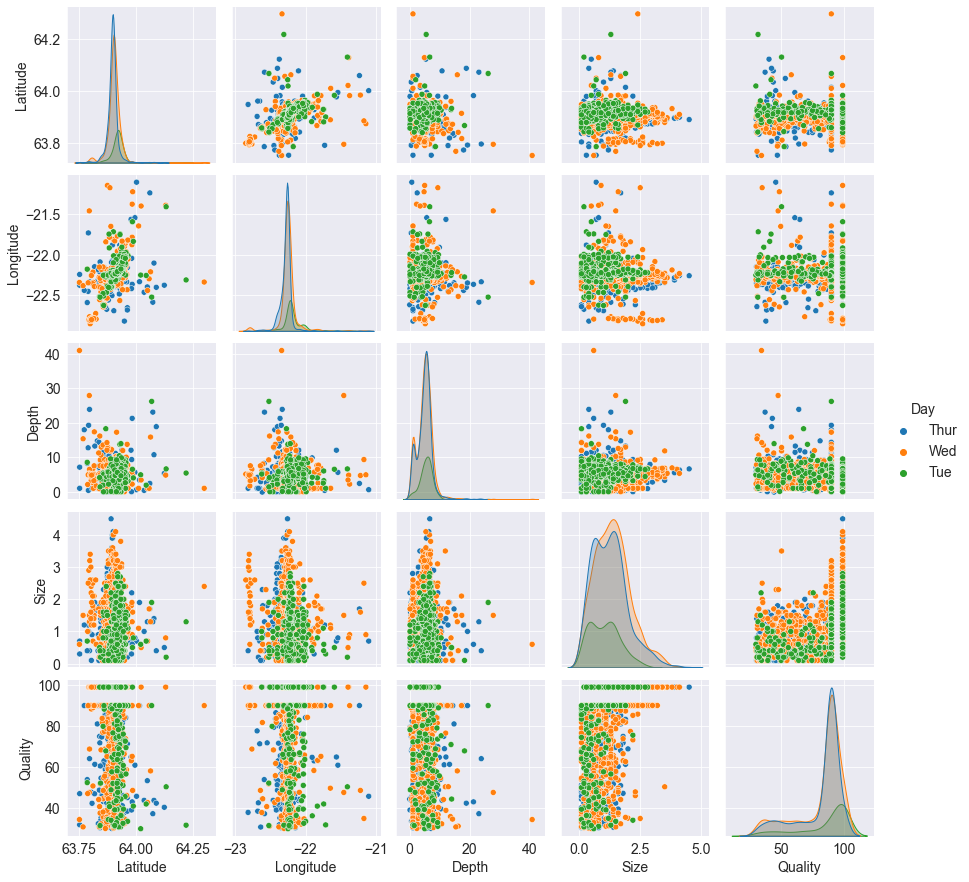

In [4]:
sns.pairplot(quake_data_df, hue='Day');

In [18]:
strength_df = quake_data_df[['Size']]
strength_describtion = strength_df.describe()
strength_top = quake_data_df.sort_values('Size', ascending=False).head(10)
strong_quakes_df = quake_data_df[quake_data_df.Size > 3.0]

In [19]:
daily_quake_df = quake_data_df.groupby('Day')[['Size']].mean()
daily_quake_df = daily_quake_df.reindex(['Tue', 'Wed', 'Thur'])

In [34]:
deepest_df = quake_data_df.sort_values('Depth', ascending=False).head(10)
shallow_quakes_df = quake_data_df[quake_data_df.Depth < 20.0]

## Exploratory Analysis and Visualization

**TODO** - write some explanation here.



> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

#### Size of earthquakes
For the first part we can simply take a look at the total number of earthquakes that have been in the south western area of Iceland in the last 48 hours. By looking at the histogram, displayed below, we can see the ammount at a given strength on the Richter magnitude scale.

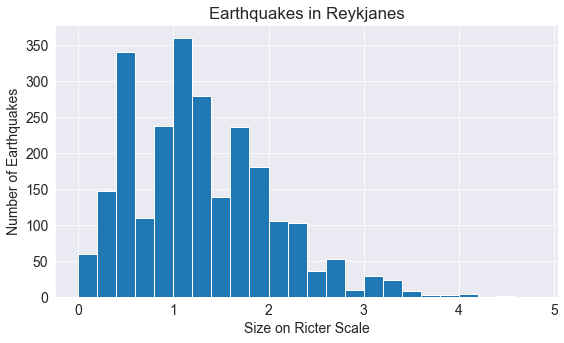

In [32]:
plt.title('Earthquakes in Reykjanes');
plt.hist(quake_data_df.Size, bins=np.arange(0, 5, 0.2));
plt.xlabel('Size on Ricter Scale');
plt.ylabel('Number of Earthquakes');

We can see that most of the earthquakes are below 2 on the Richter magnitude scale but there are a few that. In the table below you can see a list of the 10 strongest earthquakes. Below that there is a table that shows the total number of eathquakes average size and other interesting data about the size of them.

In [8]:
strength_top

,Day,Date,Time,Latitude,Longitude,Depth,Size,Quality
320,Thur,2021-03-04,8:54:07,63.891,-22.256,6.7,4.5,99.0
935,Thur,2021-03-04,0:59:08,63.900,-22.253,6.4,4.1,99.0
2083,Wed,2021-03-03,2:12:01,63.911,-22.229,5.4,4.1,99.0
1703,Wed,2021-03-03,15:11:20,63.901,-22.262,6.6,4.0,99.0
549,Thur,2021-03-04,5:44:57,63.897,-22.255,6.1,4.0,99.0
590,Thur,2021-03-04,5:17:54,63.896,-22.281,5.6,3.9,99.0
563,Thur,2021-03-04,5:36:17,63.898,-22.309,5.7,3.9,99.0
1870,Wed,2021-03-03,11:05:04,63.933,-22.185,7.0,3.8,99.0
684,Thur,2021-03-04,4:04:01,63.894,-22.273,5.5,3.6,99.0
1400,Wed,2021-03-03,19:04:27,63.898,-22.281,5.4,3.6,99.0


In [9]:
strength_describtion

,Size
count,2467.000000
mean,1.275638
std,0.722455
min,0.100000
25%,0.700000
50%,1.200000
75%,1.700000
max,4.500000


#### Location
As we are only looking at the recent activity in the South Western Iceland we are analysing data in a fairly small area. However the earthquakes are clustered into a particular area. As seen on the scatter plot below, majority of the earthquakes happen between 63.8N & 64.0N latitude and 22.5W & 22.0W longitude. This is on the south base of a volcano called Keilir and it is in that area that experts are anticipating an eruption, if there will be one.

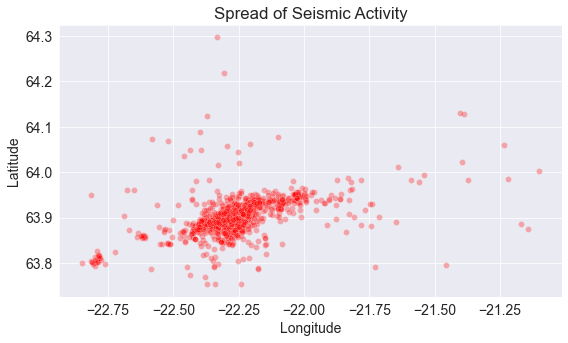

In [10]:
plt.title("Spread of Seismic Activity")
sns.scatterplot(x=quake_data_df.Longitude,
                y=quake_data_df.Latitude,
                alpha=0.3,
                color='r');

#### Depth
When talking about the depth of earthquakes, it can be categorised into three categories. All the earthquakes in this dataset are so called shallow earthquakes, meaning that they take place at a depth less than 70km. The table below lists the 10 deepest quakes measured.

In [28]:
deepest_df

,Day,Date,Time,Latitude,Longitude,Depth,Size,Quality
1398,Wed,2021-03-03,19:06:35,63.753,-22.339,40.9,0.6,34.57
1162,Wed,2021-03-03,22:02:38,63.796,-21.456,27.9,1.5,47.75
2338,Tue,2021-03-02,16:42:51,64.068,-22.520,26.2,1.9,90.02
601,Thur,2021-03-04,5:09:36,63.797,-22.331,23.9,0.4,64.19
480,Thur,2021-03-04,6:27:51,64.073,-22.583,23.1,1.3,37.41
364,Thur,2021-03-04,8:11:09,63.983,-22.362,21.3,0.6,43.17
812,Thur,2021-03-04,2:15:57,63.793,-22.345,19.3,1.0,90.01
638,Thur,2021-03-04,4:36:26,64.088,-22.399,18.9,0.4,42.53
2147,Tue,2021-03-02,23:38:26,63.868,-22.271,18.3,0.1,67.97
472,Thur,2021-03-04,6:32:05,63.774,-22.437,18.0,1.2,90.01


As seen on the table, only six of the earthquakes measured are deeper than 20km below the surface. Because of this I sorted out those datapoints and the histogram below displays how many earthquakes have been at each depth level. A majority of the earthquakes have been at a depth less than 7.5Km with close to 400 at a depth less than 2.5Km.

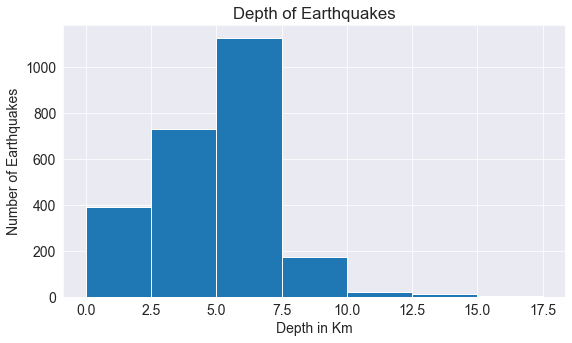

In [39]:
plt.hist(shallow_quakes_df.Depth, bins=np.arange(0, 20, 2.5));
plt.title('Depth of Earthquakes');
plt.xlabel('Depth in Km');
plt.ylabel('Number of Earthquakes');

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

## Asking and Answering Questions

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Is there a difference in average size between days?

Considering that this series of earthquakes has been going on for a few days it would be interesting to see if there is an increase in the average strength between days. As seen in the table and on graph below the change is insignificant between the days. The problem with the data we are currently using is that it is very limited (only 48 hours from retrieving the data).

While preparing the data earlier we used Pandas to create a new dataframe and the function mean() to calculate the average size of earthquakes each day. Additionally we use a pandas function reindex() to ensure the order of days is correct.

To greate the graph we use Matplotlib, the bar(), plot() and title() functions. These three functions combined create the bargraph, the line plot and the title above the graph.

In [44]:
daily_quake_df

,Size
Day,
Tue,1.045015
Wed,1.364464
Thur,1.252854


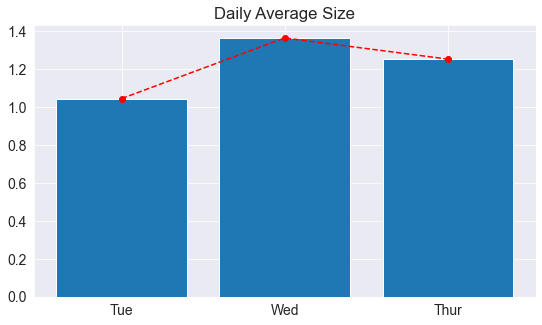

In [46]:
plt.bar(daily_quake_df.index, daily_quake_df.Size);
plt.plot(daily_quake_df.index, daily_quake_df.Size, 'o--r');
plt.title('Daily Average Size');

#### Q2: TODO - ask a question here and answer it below

#### Q3: TODO - ask a question here and answer it below

#### Q4: TODO - ask a question here and answer it below

#### Q5: TODO - ask a question here and answer it below

Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [ ]:
import jovian

In [41]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "joeolafs/earthquake-sw-iceland" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/joeolafs/earthquake-sw-iceland


'https://jovian.ai/joeolafs/earthquake-sw-iceland'

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [ ]:
import jovian

In [ ]:
jovian.commit()